# 5.1 일반화: 머신 러닝의 목표
## 5.1.1 과소적합과 가대적합

In [5]:
# 5-1 MNIST에 백색 잡음 픽셀과 0픽셀 추가하기

from tensorflow.keras.datasets import mnist
import numpy as np

(train_images, train_labels), _ = mnist.load_data()
train_images = train_images.reshape((60000, 28 * 28))
train_images = train_images.astype("float32") / 255
train_images_with_noise_channels = np.concatenate(
    [train_images, np.random.random((len(train_images), 784))], axis = 1)
train_images_with_zeros_channels = np.concatenate(
    [train_images, np.zeros((len(train_images), 784))], axis = 1)

In [6]:
# 5-2 백색 잡음과 0을 추가한 MNIST 데이터에서 모델 훈련하기

from tensorflow import keras
from tensorflow.keras import layers

def get_model():
  model = keras.Sequential([
      layers.Dense(512, activation='relu'),
      layers.Dense(10, activation='softmax')
  ])
  model.compile(optimizer='rmsprop',
                loss='sparse_categorical_crossentropy',
                metrics=['accuracy'])
  return model

model = get_model()
history_noise = model.fit(
    train_images_with_noise_channels, train_labels,
    epochs = 10,
    batch_size = 128,
    validation_split = 0.2
)

model = get_model()
history_zeros = model.fit(
    train_images_with_zeros_channels, train_labels,
    epochs = 10,
    batch_size = 128,
    validation_split = 0.2
)

Epoch 1/10
375/375 ━━━━━━━━━━━━━━━━━━━━ 11s 24ms/step - accuracy: 0.6951 - loss: 1.0821 - val_accuracy: 0.9215 - val_loss: 0.2720
Epoch 2/10
375/375 ━━━━━━━━━━━━━━━━━━━━ 10s 24ms/step - accuracy: 0.9095 - loss: 0.2805 - val_accuracy: 0.9419 - val_loss: 0.1955
Epoch 3/10
375/375 ━━━━━━━━━━━━━━━━━━━━ 9s 22ms/step - accuracy: 0.9449 - loss: 0.1743 - val_accuracy: 0.9432 - val_loss: 0.1897
Epoch 4/10
375/375 ━━━━━━━━━━━━━━━━━━━━ 12s 32ms/step - accuracy: 0.9622 - loss: 0.1237 - val_accuracy: 0.9598 - val_loss: 0.1323
Epoch 5/10
375/375 ━━━━━━━━━━━━━━━━━━━━ 9s 23ms/step - accuracy: 0.9718 - loss: 0.0912 - val_accuracy: 0.9616 - val_loss: 0.1326
Epoch 6/10
375/375 ━━━━━━━━━━━━━━━━━━━━ 10s 24ms/step - accuracy: 0.9793 - loss: 0.0666 - val_accuracy: 0.9610 - val_loss: 0.1346
Epoch 7/10
375/375 ━━━━━━━━━━━━━━━━━━━━ 8s 18ms/step - accuracy: 0.9857 - loss: 0.0474 - val_accuracy: 0.9655 - val_loss: 0.1299
Epoch 8/10
375/375 ━━━━━━━━━━━━━━━━━━━━ 10s 19ms/step - accuracy: 0.9890 - loss: 0.0344 - val

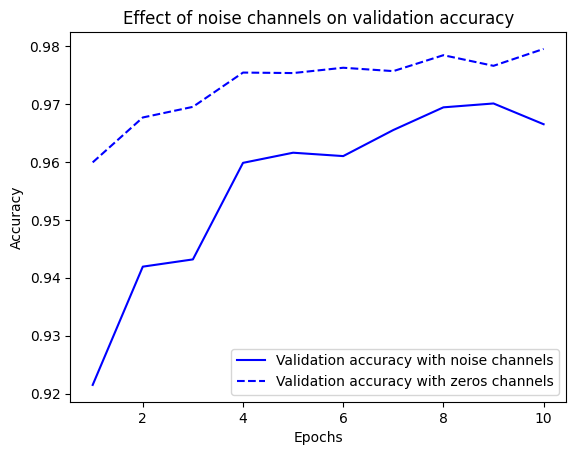

In [7]:
# 5-3 검증 정확도 비교 그래프 그리기

import matplotlib.pyplot as plt

val_acc_noise = history_noise.history["val_accuracy"]
val_acc_zeros = history_zeros.history["val_accuracy"]
epochs = range(1, 11)
plt.plot(epochs, val_acc_noise, "b-", label = "Validation accuracy with noise channels")
plt.plot(epochs, val_acc_zeros, "b--", label = "Validation accuracy with zeros channels")
plt.title("Effect of noise channels on validation accuracy")
plt.xlabel("Epochs")
plt.ylabel("Accuracy")
plt.legend()
plt.show()

# 5.1.2 딥러닝에서 일반화의 본질

In [8]:
# 5-4 랜덤하게 섞은 레이블로 MNIST 모델 훈련하기

(train_images, train_labels), _ = mnist.load_data()
train_images = train_images.reshape((60000, 28 * 28))
train_images = train_images.astype("float32") / 255

random_train_labels = train_labels[:]
np.random.shuffle(random_train_labels)

model = keras.Sequential([
      layers.Dense(512, activation='relu'),
      layers.Dense(10, activation='softmax')
  ])
model.compile(optimizer='rmsprop',
              loss='sparse_categorical_crossentropy',
              metrics=['accuracy'])

model.fit(train_images, random_train_labels,
          epochs = 100,
          batch_size = 128,
          validation_split = 0.2)

Epoch 1/100
375/375 ━━━━━━━━━━━━━━━━━━━━ 7s 16ms/step - accuracy: 0.1034 - loss: 2.3340 - val_accuracy: 0.1034 - val_loss: 2.3038
Epoch 2/100
375/375 ━━━━━━━━━━━━━━━━━━━━ 4s 11ms/step - accuracy: 0.1208 - loss: 2.2971 - val_accuracy: 0.1053 - val_loss: 2.3114
Epoch 3/100
375/375 ━━━━━━━━━━━━━━━━━━━━ 4s 11ms/step - accuracy: 0.1298 - loss: 2.2878 - val_accuracy: 0.1058 - val_loss: 2.3170
Epoch 4/100
375/375 ━━━━━━━━━━━━━━━━━━━━ 6s 14ms/step - accuracy: 0.1458 - loss: 2.2735 - val_accuracy: 0.1085 - val_loss: 2.3308
Epoch 5/100
375/375 ━━━━━━━━━━━━━━━━━━━━ 4s 11ms/step - accuracy: 0.1608 - loss: 2.2552 - val_accuracy: 0.1083 - val_loss: 2.3429
Epoch 6/100
375/375 ━━━━━━━━━━━━━━━━━━━━ 4s 11ms/step - accuracy: 0.1730 - loss: 2.2355 - val_accuracy: 0.1007 - val_loss: 2.3479
Epoch 7/100
375/375 ━━━━━━━━━━━━━━━━━━━━ 8s 18ms/step - accuracy: 0.1878 - loss: 2.2129 - val_accuracy: 0.1012 - val_loss: 2.3639
Epoch 8/100
375/375 ━━━━━━━━━━━━━━━━━━━━ 4s 11ms/step - accuracy: 0.2024 - loss: 2.1826 - 

# 5.2 머신 러닝 모델 평가
## 5.2.1 훈련, 검증, 테스트 세트

In [9]:
 # 5-5 홀드아웃 검증 구현 예

'''
num_validation_samples = 10000
np.random.shuffle(data) # 셔플링이 일반적으로 좋다
validation_data = data[:num_validation_samples] # 검증 세트
training_data = data[num_validation_samples:] # 훈련 세트
model = get_model()
model.fit(training_data, ...)
validation_score = model.evaluate(validation_data, ...) # 훈련 세트에서 모델을 훈련하고 검증 세트로 평가함
...
model = get_model()
model.fit(np.concatenate([training_data,
                          validation_data]), ...) # 하이퍼파라미터 튜닝이 끝나면 테스트 데이터를 제외한 모든 데이터를 사용하여 모델을 다시 훈련 시킴
test_score = model.evaluate(test_data, ...)
'''

' \nnum_validation_samples = 10000\nnp.random.shuffle(data) # 셔플링이 일반적으로 좋다\nvalidation_data = data[:num_validation_samples] # 검증 세트\ntraining_data = data[num_validation_samples:] # 훈련 세트\nmodel = get_model()\nmodel.fit(training_data, ...)\nvalidation_score = model.evaluate(validation_data, ...) # 훈련 세트에서 모델을 훈련하고 검증 세트로 평가함\n...\nmodel = get_model()\nmodel.fit(np.concatenate([training_data,\n                         validation_data]), ...) # 하이퍼파라미터 튜닝이 끝나면 테스트 데이터를 제외한 모든 데이터를 사용하여 모델을 다시 훈련 시킴\ntest_score = model.evaluate(test_data, ...) \n'

In [10]:
# K-겹 교차 검증 구현 예
'''
 k = 3
 num_validation_samples = len(data) // k
 np.random.shuffle(data)
 validation_scores = []
 for fold in range(k):
  validation_data = data[num_validation_samples * fold:
                         num_validation_samples * (fold + 1)] # 검증 데이터 부분 선택
  training_data = np.concatenate(
      data[:num_validation_samples * fold],
      data[num_validation_samples * (fold + 1):])
  model = get_model()
  model.fit(training_data, ...)
  validation_score = model.evaluate(validation_data, ...)
  validation_scores.append(validation_score)
validation_score = np.average(validation_scores) # 검증 점수: K개의 폴드 검증 점수 평균
model = get_model()
model.fit(data, ...)
test_score = model.evaluate(test_data, ...) # 테스트 데이터를 제외한 전체 데이터로 최종 모델 훈련
'''

'\n k = 3\n num_validation_samples = len(data) // k\n np.random.shuffle(data)\n validation_scores = []\n for fold in range(k):\n  validation_data = data[num_validation_samples * fold:\n                         num_validation_samples * (fold + 1)] # 검증 데이터 부분 선택\n  training_data = np.concatenate(\n      data[:num_validation_samples * fold],\n      data[num_validation_samples * (fold + 1):])\n  model = get_model()\n  model.fit(training_data, ...)\n  validation_score = model.evaluate(validation_data, ...)\n  validation_scores.append(validation_score)\nvalidation_score = np.average(validation_scores) # 검증 점수: K개의 폴드 검증 점수 평균\nmodel = get_model()\nmodel.fit(data, ...)\ntest_score = model.evaluate(test_data, ...) # 테스트 데이터를 제외한 전체 데이터로 최종 모델 훈련\n'

# 5.3 훈련 성능 향상하기
## 5.3.1 경사 하강법의 핵심 파라미터 튜닝하기

In [11]:
# 5-7 잘못된 높은 학습률로 MNIST 모델 훈련하기

(train_images, train_labels), _ = mnist.load_data()
train_images = train_images.reshape((60000, 28 * 28))
train_images = train_images.astype("float32") / 255

model = keras.Sequential([
      layers.Dense(512, activation='relu'),
      layers.Dense(10, activation='softmax')
  ])
model.compile(optimizer=keras.optimizers.RMSprop(1.),
              loss='sparse_categorical_crossentropy',
              metrics=['accuracy'])

model.fit(train_images, random_train_labels,
          epochs = 10,
          batch_size = 128,
          validation_split = 0.2)

Epoch 1/10
375/375 ━━━━━━━━━━━━━━━━━━━━ 5s 12ms/step - accuracy: 0.0971 - loss: 2300.8264 - val_accuracy: 0.1016 - val_loss: 2.4342
Epoch 2/10
375/375 ━━━━━━━━━━━━━━━━━━━━ 5s 11ms/step - accuracy: 0.1052 - loss: 2.4467 - val_accuracy: 0.1016 - val_loss: 2.4349
Epoch 3/10
375/375 ━━━━━━━━━━━━━━━━━━━━ 6s 14ms/step - accuracy: 0.1000 - loss: 2.4494 - val_accuracy: 0.1017 - val_loss: 2.3864
Epoch 4/10
375/375 ━━━━━━━━━━━━━━━━━━━━ 10s 13ms/step - accuracy: 0.1059 - loss: 2.4437 - val_accuracy: 0.1016 - val_loss: 2.4459
Epoch 5/10
375/375 ━━━━━━━━━━━━━━━━━━━━ 5s 13ms/step - accuracy: 0.1011 - loss: 2.4536 - val_accuracy: 0.1016 - val_loss: 2.3954
Epoch 6/10
375/375 ━━━━━━━━━━━━━━━━━━━━ 4s 10ms/step - accuracy: 0.1002 - loss: 2.4484 - val_accuracy: 0.0970 - val_loss: 2.4956
Epoch 7/10
375/375 ━━━━━━━━━━━━━━━━━━━━ 4s 12ms/step - accuracy: 0.1017 - loss: 2.4491 - val_accuracy: 0.0938 - val_loss: 2.3382
Epoch 8/10
375/375 ━━━━━━━━━━━━━━━━━━━━ 5s 12ms/step - accuracy: 0.1046 - loss: 2.4439 - val_

In [12]:
# 5-8 같은 모델을 적절한 학습률로 훈련하기

model = keras.Sequential([
      layers.Dense(512, activation='relu'),
      layers.Dense(10, activation='softmax')
  ])
model.compile(optimizer=keras.optimizers.RMSprop(1e-2),
              loss='sparse_categorical_crossentropy',
              metrics=['accuracy'])

model.fit(train_images, random_train_labels,
          epochs = 10,
          batch_size = 128,
          validation_split = 0.2)

Epoch 1/10
375/375 ━━━━━━━━━━━━━━━━━━━━ 5s 11ms/step - accuracy: 0.1020 - loss: 2.6758 - val_accuracy: 0.1126 - val_loss: 2.3031
Epoch 2/10
375/375 ━━━━━━━━━━━━━━━━━━━━ 5s 11ms/step - accuracy: 0.1088 - loss: 2.3031 - val_accuracy: 0.1130 - val_loss: 2.3025
Epoch 3/10
375/375 ━━━━━━━━━━━━━━━━━━━━ 6s 14ms/step - accuracy: 0.1118 - loss: 2.3033 - val_accuracy: 0.1132 - val_loss: 2.3017
Epoch 4/10
375/375 ━━━━━━━━━━━━━━━━━━━━ 4s 11ms/step - accuracy: 0.1105 - loss: 2.3023 - val_accuracy: 0.1119 - val_loss: 2.3026
Epoch 5/10
375/375 ━━━━━━━━━━━━━━━━━━━━ 4s 12ms/step - accuracy: 0.1123 - loss: 2.3016 - val_accuracy: 0.1115 - val_loss: 2.3091
Epoch 6/10
375/375 ━━━━━━━━━━━━━━━━━━━━ 5s 14ms/step - accuracy: 0.1120 - loss: 2.3004 - val_accuracy: 0.1136 - val_loss: 2.3082
Epoch 7/10
375/375 ━━━━━━━━━━━━━━━━━━━━ 10s 12ms/step - accuracy: 0.1155 - loss: 2.2992 - val_accuracy: 0.1133 - val_loss: 2.3034
Epoch 8/10
375/375 ━━━━━━━━━━━━━━━━━━━━ 5s 13ms/step - accuracy: 0.1169 - loss: 2.2990 - val_acc

# 5.3.3 모델 용량 늘리기

In [13]:
# 5-9 MNIST 데이터를 사용한 간단한 로지스틱 회귀 모델

model = keras.Sequential([layers.Dense(10, activation='softmax')])

model.compile(optimizer='rmsprop',
              loss='sparse_categorical_crossentropy',
              metrics=['accuracy'])

history_small_model = model.fit(train_images, train_labels,
          epochs = 20,
          batch_size = 128,
          validation_split = 0.2)

Epoch 1/20
375/375 ━━━━━━━━━━━━━━━━━━━━ 3s 5ms/step - accuracy: 0.7273 - loss: 1.0489 - val_accuracy: 0.9046 - val_loss: 0.3603
Epoch 2/20
375/375 ━━━━━━━━━━━━━━━━━━━━ 2s 4ms/step - accuracy: 0.9008 - loss: 0.3655 - val_accuracy: 0.9143 - val_loss: 0.3136
Epoch 3/20
375/375 ━━━━━━━━━━━━━━━━━━━━ 2s 3ms/step - accuracy: 0.9098 - loss: 0.3234 - val_accuracy: 0.9183 - val_loss: 0.2935
Epoch 4/20
375/375 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step - accuracy: 0.9148 - loss: 0.3016 - val_accuracy: 0.9211 - val_loss: 0.2844
Epoch 5/20
375/375 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step - accuracy: 0.9176 - loss: 0.2921 - val_accuracy: 0.9230 - val_loss: 0.2780
Epoch 6/20
375/375 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step - accuracy: 0.9206 - loss: 0.2830 - val_accuracy: 0.9234 - val_loss: 0.2752
Epoch 7/20
375/375 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step - accuracy: 0.9215 - loss: 0.2847 - val_accuracy: 0.9261 - val_loss: 0.2716
Epoch 8/20
375/375 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step - accuracy: 0.9242 - loss: 0.2760 - val_accuracy: 0.

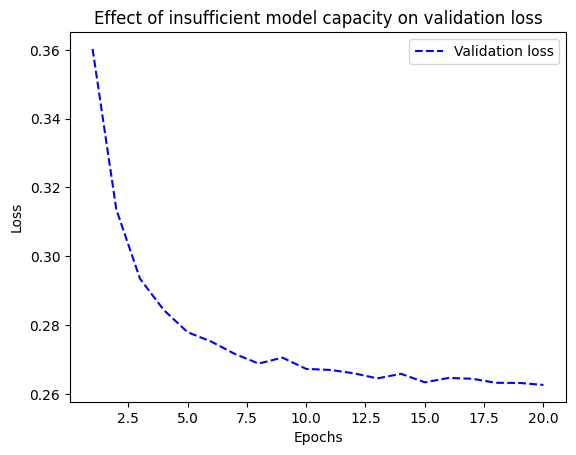

In [14]:
val_loss = history_small_model.history["val_loss"]
epochs = range(1, 21)
plt.plot(epochs, val_loss, "b--", label='Validation loss')
plt.title("Effect of insufficient model capacity on validation loss")
plt.xlabel("Epochs")
plt.ylabel("Loss")
plt.legend()
plt.show()

# 5.4 일반화 성능 향상하기
## 5.4.4 모델 규제하기

In [15]:
# 5-10 원본 모델

from tensorflow.keras.datasets import imdb
(train_data, train_labels), _ = imdb.load_data(num_words = 10000)

def vectorize_sequences(sequences, dimension=10000):
  results = np.zeros((len(sequences), dimension))
  for i, sequence in enumerate(sequences):
    results[i, sequence]=1.
  return results
train_data = vectorize_sequences(train_data)

model = keras.Sequential([
      layers.Dense(16, activation='relu'),
      layers.Dense(16, activation='relu'),
      layers.Dense(1, activation='sigmoid')
  ])

model.compile(optimizer='rmsprop',
              loss='binary_crossentropy',
              metrics=['accuracy'])

history_original = model.fit(train_data, train_labels,
          epochs = 20,
          batch_size = 512,
          validation_split = 0.4)

Epoch 1/20
30/30 ━━━━━━━━━━━━━━━━━━━━ 4s 89ms/step - accuracy: 0.6850 - loss: 0.6029 - val_accuracy: 0.8391 - val_loss: 0.4126
Epoch 2/20
30/30 ━━━━━━━━━━━━━━━━━━━━ 4s 37ms/step - accuracy: 0.8926 - loss: 0.3351 - val_accuracy: 0.8869 - val_loss: 0.3094
Epoch 3/20
30/30 ━━━━━━━━━━━━━━━━━━━━ 1s 36ms/step - accuracy: 0.9218 - loss: 0.2421 - val_accuracy: 0.8842 - val_loss: 0.2957
Epoch 4/20
30/30 ━━━━━━━━━━━━━━━━━━━━ 1s 37ms/step - accuracy: 0.9341 - loss: 0.1957 - val_accuracy: 0.8917 - val_loss: 0.2753
Epoch 5/20
30/30 ━━━━━━━━━━━━━━━━━━━━ 2s 60ms/step - accuracy: 0.9474 - loss: 0.1592 - val_accuracy: 0.8867 - val_loss: 0.2801
Epoch 6/20
30/30 ━━━━━━━━━━━━━━━━━━━━ 2s 63ms/step - accuracy: 0.9557 - loss: 0.1365 - val_accuracy: 0.8864 - val_loss: 0.2875
Epoch 7/20
30/30 ━━━━━━━━━━━━━━━━━━━━ 2s 38ms/step - accuracy: 0.9679 - loss: 0.1092 - val_accuracy: 0.8789 - val_loss: 0.3295
Epoch 8/20
30/30 ━━━━━━━━━━━━━━━━━━━━ 1s 38ms/step - accuracy: 0.9729 - loss: 0.0965 - val_accuracy: 0.8798 - v

In [16]:
# 5-11 적은 용량의 모델

model = keras.Sequential([
      layers.Dense(4, activation='relu'),
      layers.Dense(4, activation='relu'),
      layers.Dense(1, activation='sigmoid')
  ])

model.compile(optimizer='rmsprop',
              loss='binary_crossentropy',
              metrics=['accuracy'])

history_smaller_model = model.fit(train_data, train_labels,
          epochs = 20,
          batch_size = 512,
          validation_split = 0.4)

Epoch 1/20
30/30 ━━━━━━━━━━━━━━━━━━━━ 4s 93ms/step - accuracy: 0.6534 - loss: 0.6422 - val_accuracy: 0.8134 - val_loss: 0.5012
Epoch 2/20
30/30 ━━━━━━━━━━━━━━━━━━━━ 4s 47ms/step - accuracy: 0.8686 - loss: 0.4509 - val_accuracy: 0.8639 - val_loss: 0.4067
Epoch 3/20
30/30 ━━━━━━━━━━━━━━━━━━━━ 3s 60ms/step - accuracy: 0.9004 - loss: 0.3525 - val_accuracy: 0.8816 - val_loss: 0.3414
Epoch 4/20
30/30 ━━━━━━━━━━━━━━━━━━━━ 2s 36ms/step - accuracy: 0.9177 - loss: 0.2835 - val_accuracy: 0.8875 - val_loss: 0.3070
Epoch 5/20
30/30 ━━━━━━━━━━━━━━━━━━━━ 1s 35ms/step - accuracy: 0.9274 - loss: 0.2374 - val_accuracy: 0.8899 - val_loss: 0.2886
Epoch 6/20
30/30 ━━━━━━━━━━━━━━━━━━━━ 1s 35ms/step - accuracy: 0.9342 - loss: 0.2058 - val_accuracy: 0.8899 - val_loss: 0.2782
Epoch 7/20
30/30 ━━━━━━━━━━━━━━━━━━━━ 1s 34ms/step - accuracy: 0.9453 - loss: 0.1790 - val_accuracy: 0.8830 - val_loss: 0.2840
Epoch 8/20
30/30 ━━━━━━━━━━━━━━━━━━━━ 1s 33ms/step - accuracy: 0.9535 - loss: 0.1562 - val_accuracy: 0.8924 - v

In [17]:
# 5-12 큰 용량의 모델

from tensorflow import keras
from tensorflow.keras import layers

model = keras.Sequential([
      layers.Dense(512, activation='relu'),
      layers.Dense(512, activation='relu'),
      layers.Dense(1, activation='sigmoid')
  ])

model.compile(optimizer='rmsprop',
              loss='binary_crossentropy',
              metrics=['accuracy'])

history_larger_model = model.fit(train_data, train_labels,
          epochs = 20,
          batch_size = 512,
          validation_split = 0.4)

Epoch 1/20
30/30 ━━━━━━━━━━━━━━━━━━━━ 12s 362ms/step - accuracy: 0.6644 - loss: 0.6578 - val_accuracy: 0.8492 - val_loss: 0.3579
Epoch 2/20
30/30 ━━━━━━━━━━━━━━━━━━━━ 9s 297ms/step - accuracy: 0.8492 - loss: 0.3542 - val_accuracy: 0.8421 - val_loss: 0.3553
Epoch 3/20
30/30 ━━━━━━━━━━━━━━━━━━━━ 12s 343ms/step - accuracy: 0.9086 - loss: 0.2360 - val_accuracy: 0.8828 - val_loss: 0.2832
Epoch 4/20
30/30 ━━━━━━━━━━━━━━━━━━━━ 21s 356ms/step - accuracy: 0.9319 - loss: 0.1769 - val_accuracy: 0.8873 - val_loss: 0.2887
Epoch 5/20
30/30 ━━━━━━━━━━━━━━━━━━━━ 19s 315ms/step - accuracy: 0.9462 - loss: 0.1394 - val_accuracy: 0.8637 - val_loss: 0.3684
Epoch 6/20
30/30 ━━━━━━━━━━━━━━━━━━━━ 13s 403ms/step - accuracy: 0.9622 - loss: 0.1034 - val_accuracy: 0.8873 - val_loss: 0.3303
Epoch 7/20
30/30 ━━━━━━━━━━━━━━━━━━━━ 19s 370ms/step - accuracy: 0.9731 - loss: 0.0830 - val_accuracy: 0.8801 - val_loss: 0.3779
Epoch 8/20
30/30 ━━━━━━━━━━━━━━━━━━━━ 20s 353ms/step - accuracy: 0.9861 - loss: 0.0531 - val_accur

In [18]:
# 5-13 모델에 L2 가중치 추가하기

from tensorflow.keras import regularizers

model = keras.Sequential([
      layers.Dense(16, kernel_regularizer=regularizers.l2(0.002), activation='relu'),
      layers.Dense(16, kernel_regularizer=regularizers.l2(0.002), activation='relu'),
      layers.Dense(1, activation='sigmoid')
  ])

model.compile(optimizer='rmsprop',
              loss='binary_crossentropy',
              metrics=['accuracy'])

history_l2_reg = model.fit(train_data, train_labels,
          epochs = 20,
          batch_size = 512,
          validation_split = 0.4)

Epoch 1/20
30/30 ━━━━━━━━━━━━━━━━━━━━ 3s 61ms/step - accuracy: 0.6845 - loss: 0.6918 - val_accuracy: 0.8694 - val_loss: 0.4863
Epoch 2/20
30/30 ━━━━━━━━━━━━━━━━━━━━ 2s 50ms/step - accuracy: 0.8850 - loss: 0.4376 - val_accuracy: 0.8877 - val_loss: 0.3954
Epoch 3/20
30/30 ━━━━━━━━━━━━━━━━━━━━ 3s 64ms/step - accuracy: 0.9117 - loss: 0.3493 - val_accuracy: 0.8843 - val_loss: 0.3712
Epoch 4/20
30/30 ━━━━━━━━━━━━━━━━━━━━ 2s 39ms/step - accuracy: 0.9299 - loss: 0.2999 - val_accuracy: 0.8896 - val_loss: 0.3570
Epoch 5/20
30/30 ━━━━━━━━━━━━━━━━━━━━ 1s 40ms/step - accuracy: 0.9383 - loss: 0.2730 - val_accuracy: 0.8677 - val_loss: 0.3971
Epoch 6/20
30/30 ━━━━━━━━━━━━━━━━━━━━ 1s 38ms/step - accuracy: 0.9387 - loss: 0.2615 - val_accuracy: 0.8840 - val_loss: 0.3685
Epoch 7/20
30/30 ━━━━━━━━━━━━━━━━━━━━ 1s 39ms/step - accuracy: 0.9454 - loss: 0.2481 - val_accuracy: 0.8675 - val_loss: 0.4080
Epoch 8/20
30/30 ━━━━━━━━━━━━━━━━━━━━ 1s 36ms/step - accuracy: 0.9468 - loss: 0.2432 - val_accuracy: 0.8779 - v

In [19]:
# 5-14 케라스에서 사용할 수 있는 가중치 규제

from tensorflow.keras import regularizers
regularizers.l1(0.001) # L1 규제
regularizers.l1_l2(l1=0.001, l2=0.001) # L1 규제와 L2 규제 병행

In [20]:
# 5-15 IMDB 모델에 드롭아웃 추가하기

model = keras.Sequential([
      layers.Dense(16, activation='relu'),
      layers.Dropout(0.5),
      layers.Dense(16, activation='relu'),
      layers.Dropout(0.5),
      layers.Dense(1, activation='sigmoid')
  ])

model.compile(optimizer='rmsprop',
              loss='binary_crossentropy',
              metrics=['accuracy'])

history_dropout = model.fit(train_data, train_labels,
          epochs = 20,
          batch_size = 512,
          validation_split = 0.4)

Epoch 1/20
30/30 ━━━━━━━━━━━━━━━━━━━━ 3s 63ms/step - accuracy: 0.5628 - loss: 0.6763 - val_accuracy: 0.8327 - val_loss: 0.5442
Epoch 2/20
30/30 ━━━━━━━━━━━━━━━━━━━━ 1s 38ms/step - accuracy: 0.7134 - loss: 0.5633 - val_accuracy: 0.8674 - val_loss: 0.4411
Epoch 3/20
30/30 ━━━━━━━━━━━━━━━━━━━━ 1s 39ms/step - accuracy: 0.7877 - loss: 0.4784 - val_accuracy: 0.8744 - val_loss: 0.3685
Epoch 4/20
30/30 ━━━━━━━━━━━━━━━━━━━━ 1s 39ms/step - accuracy: 0.8387 - loss: 0.4072 - val_accuracy: 0.8835 - val_loss: 0.3254
Epoch 5/20
30/30 ━━━━━━━━━━━━━━━━━━━━ 4s 148ms/step - accuracy: 0.8702 - loss: 0.3599 - val_accuracy: 0.8871 - val_loss: 0.3024
Epoch 6/20
30/30 ━━━━━━━━━━━━━━━━━━━━ 3s 69ms/step - accuracy: 0.8927 - loss: 0.3136 - val_accuracy: 0.8896 - val_loss: 0.2890
Epoch 7/20
30/30 ━━━━━━━━━━━━━━━━━━━━ 2s 44ms/step - accuracy: 0.9077 - loss: 0.2749 - val_accuracy: 0.8873 - val_loss: 0.2889
Epoch 8/20
30/30 ━━━━━━━━━━━━━━━━━━━━ 2s 41ms/step - accuracy: 0.9178 - loss: 0.2527 - val_accuracy: 0.8879 - 